In [1]:
import gym
import numpy as np 
import pandas as pd

In [2]:
env = gym.make('CartPole-v1')

In [3]:
obs = env.reset() 
obs

array([ 0.02859325,  0.0256724 , -0.02894622, -0.02258785])

In [4]:
def showObs (theObs): 
    print('Position       = ', theObs[0], '(0 = centre, >0 = means to the right)')
    print('Speed          = ', theObs[1])
    print('Angle          = ', theObs[2])
    print('Rotation speed = ', theObs[3], '(Positive means clockwise)')

In [5]:
showObs(obs)

Position       =  0.028593246877983453 (0 = centre, >0 = means to the right)
Speed          =  0.025672398510052805
Angle          =  -0.028946215683077772
Rotation speed =  -0.022587852280370937 (Positive means clockwise)


In [6]:
env.render()

True

In [7]:
env.action_space

Discrete(2)

In [8]:
env.action_space.n

2

In [9]:
push_left = 0 
push_right = 1

In [10]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [11]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [12]:
action = push_right
obs, reward, done, info = env.step( action )

In [13]:
showObs( obs )

Position       =  0.029106694848184508 (0 = centre, >0 = means to the right)
Speed          =  0.2211972505716317
Angle          =  -0.02939797272868519
Rotation speed =  -0.32426126771700775 (Positive means clockwise)


In [14]:
reward

1.0

In [15]:
done

False

In [16]:
info

{}

In [17]:
def simple_policy( obs ): 
    angle = obs[2]
    return 0 if angle < 0 else 1

In [18]:
totals = []
for episode in range(500):
    obs=env.reset() 
    episode_rewards = 0 
    for step in range(200):
        action = simple_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        env.render() # Remove the comment character (#) to draw the environment each 
        if done:
            break
    totals.append( episode_rewards )

<IPython.core.display.Javascript object>


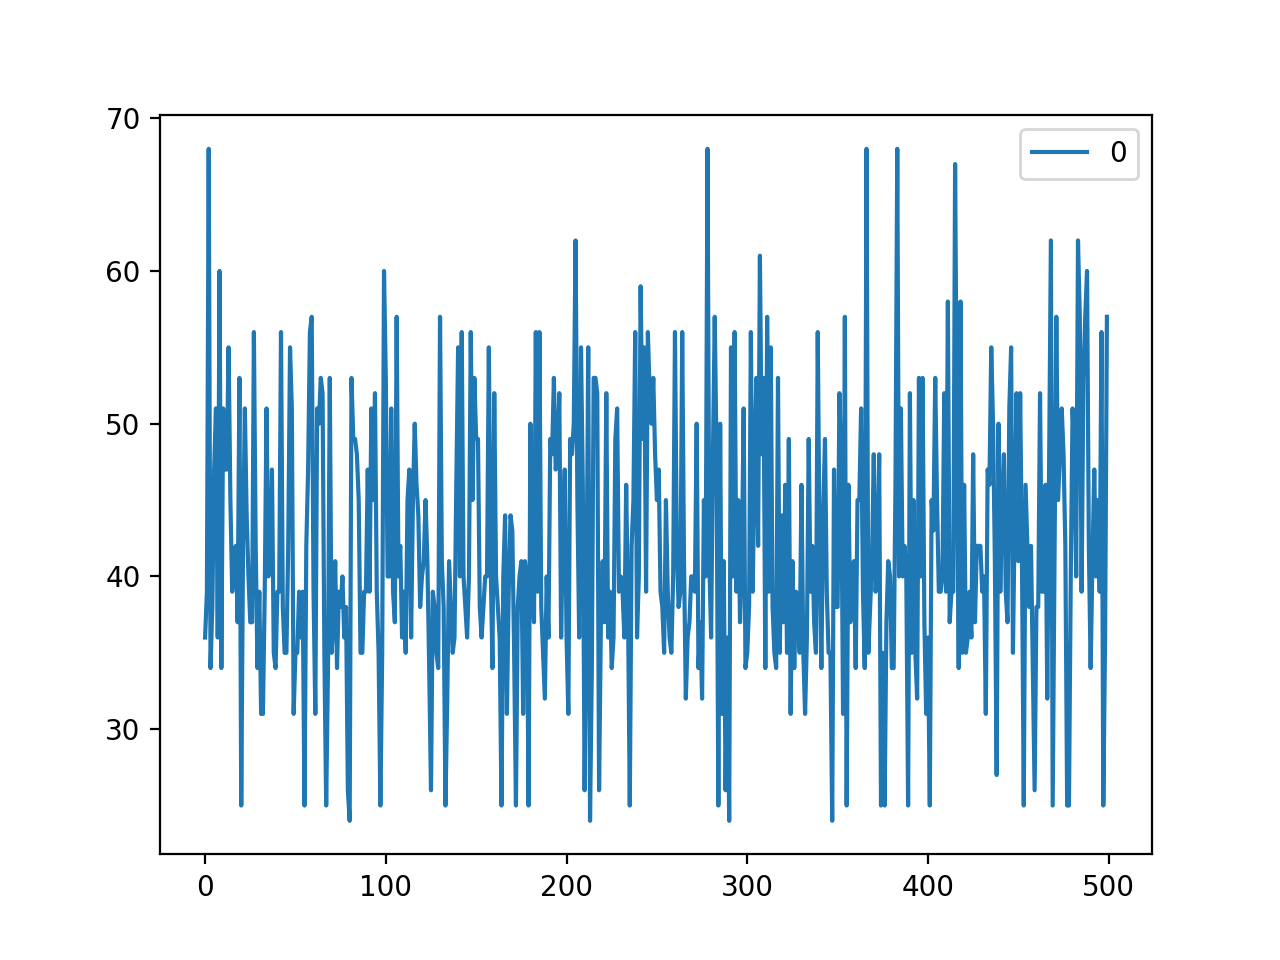

In [43]:
totals_chart = pd.DataFrame(totals) 
ax = totals_chart.plot.line()

In [22]:
totals_chart.describe()

0
count  500.000000
mean    41.914000
std      8.668153
min     24.000000
25%     36.000000
50%     40.000000
75%     48.000000
max     68.000000

In [23]:
import math                              # Used for number conversion 
%matplotlib notebook
from matplotlib import pyplot as plt     # Used to plot the chart

In [24]:
env = gym.make('CartPole-v0')

In [25]:
buckets=(1, 1, 6, 12,) # down-scaling feature space to discrete range 
buckets

(1, 1, 6, 12)

In [26]:
Q = np.zeros(buckets + (env.action_space.n,))

In [27]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [28]:
array_shape = (2,3) 
np.zeros(array_shape)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
array_shape = (2,3,4) 
np.zeros(array_shape)

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [30]:
buckets + (env.action_space.n,)

(1, 1, 6, 12, 2)

In [31]:
# initialising Q-table
Q = np.zeros(buckets + (env.action_space.n,)) 
Q

array([[[[[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0

In [32]:
n_episodes = 200    # training episodes
min_alpha = 0.1     # learning rate
min_epsilon = 0.1   # exploration rate
gamma = 1.0         # discount factor
ada_divisor = 25 
max_env_steps=None, 
monitor=False

In [33]:
def discretize(obs):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)] 
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)] 
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))] 
    new_obs = [int(round((buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
    new_obs = [min(buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
    return tuple(new_obs)

In [34]:
showObs( obs )

Position       =  0.22887487192850273 (0 = centre, >0 = means to the right)
Speed          =  1.009209970154503
Angle          =  -0.21063745506085924
Rotation speed =  -1.1645239005752894 (Positive means clockwise)


In [35]:
discrete_obs = discretize(obs) 
showObs( discrete_obs )

Position       =  0 (0 = centre, >0 = means to the right)
Speed          =  0
Angle          =  1
Rotation speed =  0 (Positive means clockwise)


In [36]:
np.argmax([1,2,1,6,2,4])

3

In [37]:
# Choosing action based on epsilon-greedy policy
def choose_action(state, epsilon):
    return env.action_space.sample() if (np.random.random() <= epsilon) else np.argmax(Q[state])

In [38]:
# Updating Q-value of state-action pair based on the update equation
def update_q(state_old, action, reward, state_new, alpha):
    Q[state_old][action] += alpha * (reward + gamma * np.max(Q[state_new]) - Q[state_old][action])

In [39]:
# Adaptive learning of Exploration Rate
def get_epsilon(t):
    return max(min_epsilon, min(1, 1.0 - math.log10((t + 1) / ada_divisor)))

In [41]:
# Adaptive learning of Learning Rate
def get_alpha(t):
    return max(min_alpha, min(1.0, 1.0 - math.log10((t + 1) / ada_divisor)))

<IPython.core.display.Javascript object>


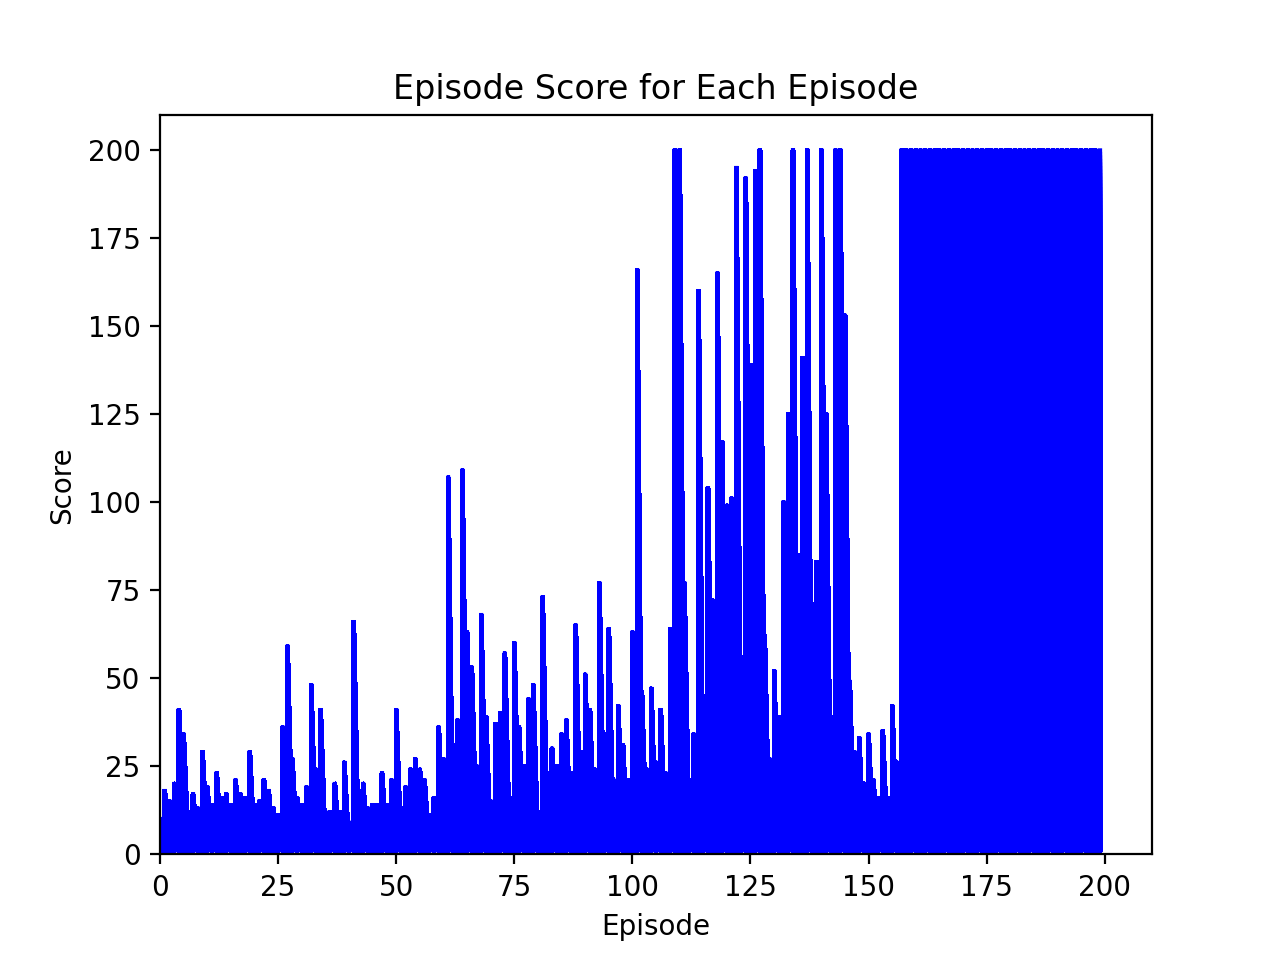

In [42]:
y_chart = []                                # Stores the y Axis data
x_chart = []                                # Stores the score for each run (x values)
plt.figure(100)                             # Gives the plot a unique number (name)
plt.xlim((0,210))                           # Max size of the x axis
plt.ylim((0,210))                           # Max size of the y axis
plt.title('Episode Score for Each Episode') # Chart title
plt.ylabel('Score')                         # Label for the y axis
plt.xlabel('Episode')                       # Label for the x axis

for e in range(n_episodes):
    # As states are continuous, discretize them into buckets 
    current_state = discretize(env.reset())
    
    # Get adaptive learning alpha and epsilon decayed over time
    alpha = get_alpha(e) 
    epsilon = get_epsilon(e)
    
    done = False 
    i=0 
    total_reward = 0
    
    while not done:
        # Render environment 
        env.render()
                            # Comment out to make the code run faster
        # Choose action according to greedy policy and take it
        action = choose_action(current_state, epsilon) 
        obs, reward, done, _ = env.step(action) 
        new_state = discretize(obs)
        
        # Update Q-Table
        update_q(current_state, action, reward, new_state, alpha) 
        current_state = new_state
        i += 1
        total_reward += reward
        y_chart.append(total_reward) 
        x_chart.append(e) 
        plt.plot(x_chart,y_chart, color='blue') 
        plt.show()
        plt.pause(0.01) 
    env.close()